In [1]:
import os
import sys
sys.path.append('../../../utils')  # Adds the parent directory to the system path
sys.path.append('../../../models')  # Adds the parent directory to the system path
import dataloader as dl

/home/sfonseka/miniconda3/envs/conda_env/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
CLASS_NAME = 'asphalt'
EXPERIMENT_MODEL = 'UNET'
DATASET_VARIANT = 'binary_grayscale'

now = 1704589116

IMG_DIR = f'/projects/0/gusr51794/srst_scratch_drive/binary_training/images/512/{CLASS_NAME}'
LABEL_DIR = f'/projects/0/gusr51794/srst_scratch_drive/binary_training/train/512/{CLASS_NAME}'
VAL_DIR = f'/projects/0/gusr51794/srst_scratch_drive/binary_training/val/512/{CLASS_NAME}'

EXPERIMENT_NAME= f'{EXPERIMENT_MODEL}_{DATASET_VARIANT}_{CLASS_NAME}'
EXPERIMENT_NAME_VERSION = f'{EXPERIMENT_MODEL}_{DATASET_VARIANT}_{CLASS_NAME}_{now}'

RESULT_DIR = f'runs/{EXPERIMENT_NAME_VERSION}'
LOG_DIR = f'runs/{EXPERIMENT_NAME_VERSION}/logs'
TENSOIRBOARD_DIR = f'runs/{EXPERIMENT_NAME_VERSION}/tensorboard'

MODEL_SAVE_PATH = f'runs/{EXPERIMENT_NAME_VERSION}/models'

MASK_COUNT = 99999

In [3]:
ANALYSIS_DIR = f'/home/sfonseka/dev/SRST/srst-analysis/{EXPERIMENT_NAME_VERSION}/analysis'

In [4]:
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [5]:
from torch.utils.data import Dataset, DataLoader
import os, cv2
import numpy as np
from PIL import Image
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [6]:
import pickle

In [7]:
CLASS_NAME = 'asphalt'
EXPERIMENT_MODEL = 'UNET'
DATASET_VARIANT = 'binary_grayscale'

now = 1704589116

IMG_DIR = f'/projects/0/gusr51794/srst_scratch_drive/binary_training/images/512/{CLASS_NAME}'
LABEL_DIR = f'/projects/0/gusr51794/srst_scratch_drive/binary_training/train/512/{CLASS_NAME}'
VAL_DIR = f'/projects/0/gusr51794/srst_scratch_drive/binary_training/val/512/{CLASS_NAME}'

EXPERIMENT_NAME= f'{EXPERIMENT_MODEL}_{DATASET_VARIANT}_{CLASS_NAME}'
EXPERIMENT_NAME_VERSION = f'{EXPERIMENT_MODEL}_{DATASET_VARIANT}_{CLASS_NAME}_{now}'

RESULT_DIR = f'runs/{EXPERIMENT_NAME_VERSION}'
LOG_DIR = f'runs/{EXPERIMENT_NAME_VERSION}/logs'
TENSOIRBOARD_DIR = f'runs/{EXPERIMENT_NAME_VERSION}/tensorboard'

MODEL_SAVE_PATH = f'runs/{EXPERIMENT_NAME_VERSION}/models'

MASK_COUNT = 99999

In [8]:
ANALYSIS_DIR = f'/home/sfonseka/dev/SRST/srst-analysis/{EXPERIMENT_NAME_VERSION}/analysis'

In [9]:
# Load predictions
with open(f'{ANALYSIS_DIR}/test_predictions.pickle', 'rb') as f:
    test_predictions = pickle.load(f)

In [10]:
len(test_predictions)


268

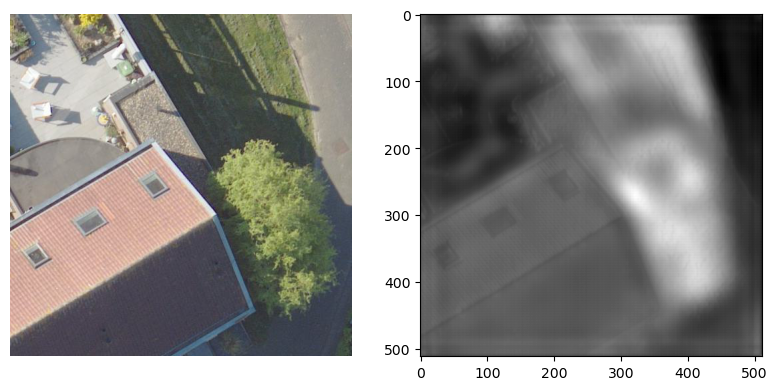

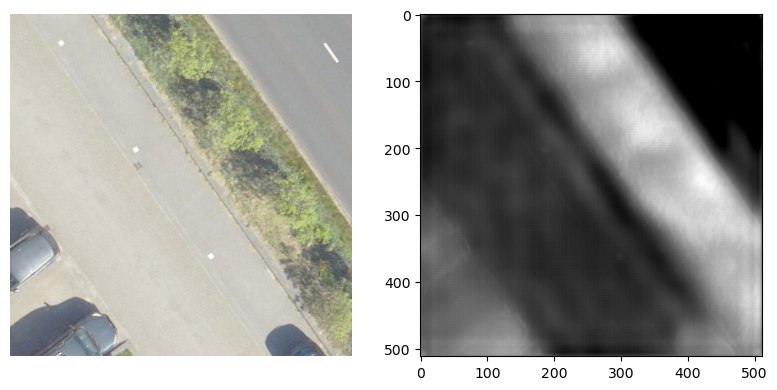

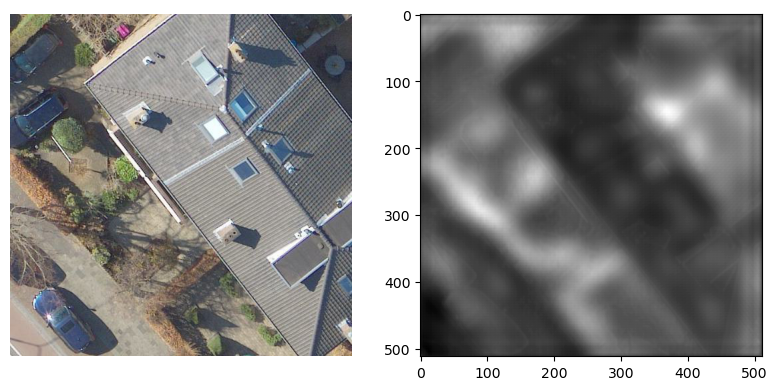

In [15]:

os.makedirs(f'{ANALYSIS_DIR}/predictions', exist_ok=True)

for p in test_predictions[:3]:
    img_np = p['img']['img_np']
    output = p['output']
    title = p['img']['path']

    output_np = output.cpu().numpy()
    output_binary_np = output.squeeze(0).squeeze(0).cpu().numpy()
        
    # Set the size of the figure
    plt.figure(figsize=(15, 5))

    # Plot the image and the mask and superimpose side by side
    plt.subplot(1, 3, 1)
    plt.imshow(img_np)
    plt.axis('off')  # Hide axes

    plt.subplot(1, 3, 2)
    plt.imshow(output_binary_np, cmap='binary')

    plt.show()